In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Actividad 1
data_act_1 = np.loadtxt('actv_1_interf.csv', delimiter=',', dtype=float, skiprows=1)

def lam(N, dn):
    return 2*dn/N
print 'N & $d_N~(\pm 0.5~\mu m)$\\\\\\hline '
for i in range(len(data_act_1[:,0])):
    print '%i & %i \\\\'%(data_act_1[i,1], data_act_1[i,0])

N & $d_N~(\pm 0.5~\mu m)$\\\hline 
20 & 7 \\
40 & 13 \\
60 & 19 \\
80 & 26 \\
100 & 32 \\
120 & 39 \\
140 & 44 \\
160 & 51 \\


In [4]:
lambda_measur= lam(data_act_1[:,1],data_act_1[:,0])
print lambda_measur
mean_lam= np.mean(lambda_measur)*1e3
mean_lam_unc = np.std(lambda_measur)*1e3

print 'N & $d_N~(\pm 0.5~\mu m)$& $\lambda_N(nm)$\\\\\\hline '
for i in range(len(data_act_1[:,0])):
    print '%i & %i & $%.1f \pm %0.1f$\\\\'%(data_act_1[i,1],\
                                          data_act_1[i,0], \
                                          lambda_measur[i]*1e3,\
                                         1e3*lambda_measur[i]*0.5/data_act_1[i,0])

[ 0.7         0.65        0.63333333  0.65        0.64        0.65
  0.62857143  0.6375    ]
N & $d_N~(\pm 0.5~\mu m)$& $\lambda_N(nm)$\\\hline 
20 & 7 & $700.0 \pm 50.0$\\
40 & 13 & $650.0 \pm 25.0$\\
60 & 19 & $633.3 \pm 16.7$\\
80 & 26 & $650.0 \pm 12.5$\\
100 & 32 & $640.0 \pm 10.0$\\
120 & 39 & $650.0 \pm 8.3$\\
140 & 44 & $628.6 \pm 7.1$\\
160 & 51 & $637.5 \pm 6.2$\\


In [5]:
print mean_lam, mean_lam_unc
print 100*abs(632.8-mean_lam)/632.8

648.675595238 20.8541934256
2.50878559388


$$\lambda = \frac{2d_N}{N}$$

$$d_N=\frac{\lambda N}{2}$$

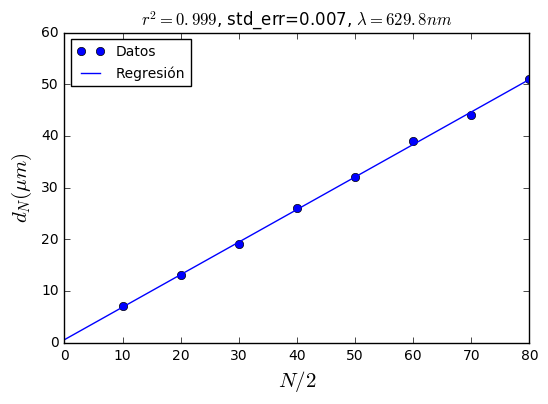

In [6]:
plt.plot(data_act_1[:,1]/2,data_act_1[:,0], 'ob', label='Datos')
plt.xlabel('$N/2$', fontsize=15)
plt.ylabel('$d_N(\mu m)$', fontsize=15)
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(data_act_1[:,1]/2,data_act_1[:,0])
nhalf=np.linspace(0, 80, 100)
plt.plot(nhalf, nhalf*slope+intercept, label=u'Regresión')
plt.title('$r^2=%.3f$, std_err=%.3f, $\lambda = %.1f nm$'%(r_value**2, std_err, 1e3*slope))
plt.legend(loc=0, fontsize=10)
plt.gcf()
plt.savefig('act_1_res.png', dpi=300)

In [7]:
print 100*abs(632.8-slope*1e3)/632.8

0.480103545843


[ 10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170 180]


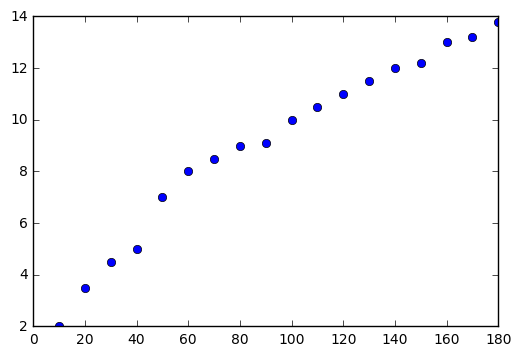

In [8]:
#Actividad 2
ang_data = np.array([2, 3.5, 4.5, 5, 7, 8, 8.5,  9, 9.1, 10, 10.5, 11, 11.5, 12, 12.2, 13, 13.2, 13.8])
min_data = np.arange(10, 10*len(ang_data)+10, 10)
print min_data
plt.plot(min_data, ang_data, 'ob')

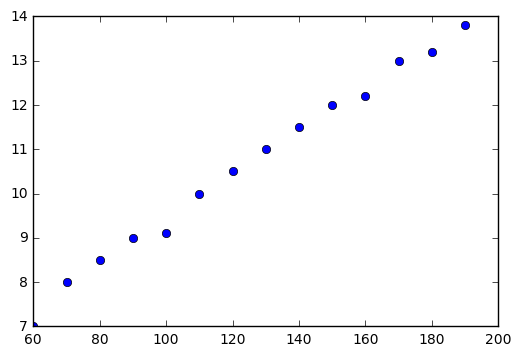

In [9]:
ang_data = np.array([7, 8, 8.5,  9, 9.1, 10, 10.5, 11, 11.5, 12, 12.2, 13, 13.2, 13.8])
min_data = 50+np.arange(10, 10*len(ang_data)+10, 10)

plt.plot(min_data, ang_data, 'ob')



In [10]:
t=0.5e-2
lam=632.8e-9
n_vidrio =((2*t-min_data*lam)*(1-np.cos(np.deg2rad(ang_data)))+\
           ((min_data**2 * lam**2)/(4*t)))/((2*t*(1-np.cos(np.deg2rad(ang_data)))-min_data*lam))
print n_vidrio

print 'N & $\\theta~(\pm0.5~^\circ)$& $n_{vidrio}$\\\\\\hline '
for i in range(len(ang_data)):
    print '%i & %.1f & %.2f\\\\'%(min_data[i], ang_data[i], n_vidrio[i])
    
    
print np.mean(n_vidrio), np.std(n_vidrio)
print 100*abs(1.5168-np.mean(n_vidrio))/1.5168

[ 2.03244658  1.82912627  1.84765807  1.85261617  2.00162716  1.83573109
  1.81902224  1.79920774  1.77750691  1.75479973  1.79839089  1.70868134
  1.74210289  1.69754528]
N & $\theta~(\pm0.5~^\circ)$& $n_{vidrio}$\\\hline 
60 & 7.0 & 2.03\\
70 & 8.0 & 1.83\\
80 & 8.5 & 1.85\\
90 & 9.0 & 1.85\\
100 & 9.1 & 2.00\\
110 & 10.0 & 1.84\\
120 & 10.5 & 1.82\\
130 & 11.0 & 1.80\\
140 & 11.5 & 1.78\\
150 & 12.0 & 1.75\\
160 & 12.2 & 1.80\\
170 & 13.0 & 1.71\\
180 & 13.2 & 1.74\\
190 & 13.8 & 1.70\\
1.82117588346 0.0928416807507
20.0669754389


In [43]:
#Actividad 3
N_lin=5
Pf=20.
Pi=0.
Pi2=40.
Pf2=45.
N_lin2=2
t2=3e-2
dndP=N_lin*lam/(2*t2*(Pf-Pi))
n=dndP*76.+1
print n

1.00020038667


dndP=N_lin2*lam/(2*t2*(Pf2-Pi2))
n=dndP*76.+1
print n

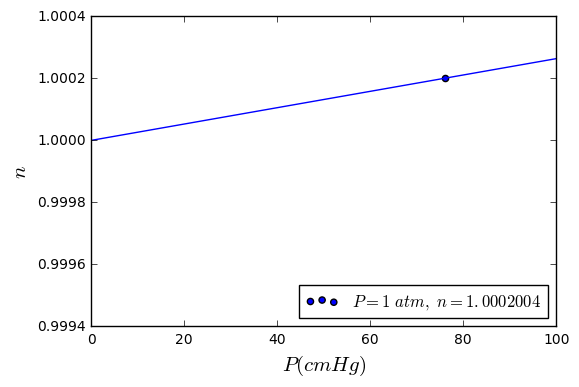

In [45]:
P_linspace=np.linspace(0, 100, 100)

plt.plot(P_linspace, dndP*P_linspace+1.)
plt.scatter(76., dndP*76.+1, label='$P=1\ atm,\ n=%.7f$'%n)
plt.ylim(0.9994,1.0004)
plt.xlim(0,100)
plt.xlabel('$P(cmHg)$', fontsize=15)
plt.ylabel('$n$', fontsize=15)
plt.legend(loc=4)
plt.savefig('refindexair.png', dpi=300)